In [1]:
from neuron import h, gui
from neuron.units import ms, mV
import Cell
import ConnectionMapGen as cmg
import spikedelayer as sd

h.load_file("stdrun.hoc")
import numpy as np
import random

In [2]:
class Network():
    def __init__(
        self, cell_type = Cell.BallAndStick, position_info = None, connection_mat = None, 
        stim_w=0.04, stim_t=9,  stim_delay=1, syn_mean_delay = 5, syn_std_delay = 5):
        """
        :param N: Number of cells.
        :param stim_w: Weight of the stimulus
        :param stim_t: time of the stimulus (in ms)
        :param stim_delay: delay of the stimulus (in ms)
        
        :param syn_w: Synaptic weight
        :param syn_delay: Delay of the synapse
        :param r: radius of the network
        """
        if connection_mat is not None:
            self._connection = connection_mat
        else:
            self._connection = cmg.RingMapGen(5, 0.1)
        
        self._syn_mean_delay = syn_mean_delay
        self._syn_std_delay = syn_std_delay
        
        self._create_cells(cell_type, position_info, connection_mat)
        h.topology()
        self._connect_cells(connection_mat)
        
        # add stimulus
        
        self._netstim = h.NetStim()
        self._netstim.number = 1
        self._netstim.start = stim_t
        
        self._nc = h.NetCon(self._netstim, self.cells[0].pos_syn)
        self._nc.delay = stim_delay
        self._nc.weight[0] = stim_w
    
    
    def _create_cells(self, cell_type, position_info, connection_mat):
        self.cells = []
        if (position_info is not None):
            for i in range(len(position_info)):
                self.cells.append(cell_type(i, position_info[i]['x'], position_info[i]['y'], position_info[i]['z'], position_info[i]['theta']))
        else:
            N = self._connection.shape[0]
            r = N * 5
            for i in range(N):
                theta = i * 2 * h.PI / N
                self.cells.append(
                    cell_type(i, h.cos(theta) * r, h.sin(theta) * r, 0, theta)
                )
        
    def _connect_cells(self, connection_mat):
        for i in range(connection_mat.shape[0]):
            for j in range(connection_mat.shape[1]):
                if connection_mat[i, j] > 0:
                    source, target = self.cells[i], self.cells[j]

                    # nc = sd.NetCon(source.soma(0.5), target.pos_syn)
                    nc = sd.NetCon(source.soma(0.5)._ref_v, target.pos_syn, sec=source.soma)
                    nc.weight[0] = connection_mat[i, j]
                    nc.mean_delay = self._syn_mean_delay * ms
                    nc.std_delay = self._syn_std_delay * ms
                    
                    # nc = h.NetCon(source.soma(0.5)._ref_v, target.pos_syn, sec=source.soma)
                    # nc.weight[0] = connection_mat[i, j]
                    # nc.delay = self._syn_mean_delay
                    
                    source._ncs.append(nc)
                elif connection_mat[i, j] < 0:
                    source, target = self.cells[i], self.cells[j]
                    
                    # nc = sd.NetCon(source.soma(0.5), target.neg_syn)
                    nc = sd.NetCon(source.soma(0.5)._ref_v, target.neg_syn, sec=source.soma)
                    nc.weight[0] = -connection_mat[i, j]
                    nc.mean_delay = self._syn_mean_delay * ms
                    nc.std_delay = self._syn_std_delay * ms
                    
                    # nc = h.NetCon(source.soma(0.5)._ref_v, target.neg_syn, sec=source.soma)
                    # nc.weight[0] = -connection_mat[i, j]
                    # nc.delay = self._syn_mean_delay
                    
                    source._ncs.append(nc)
                        
        

    

In [7]:
sm_connmat = cmg.SmallWorldMapGen(10)

# sm_connmat = np.array([[0, 1, 0, 0, 0],
#                            [0, 0, 1, 0, 0],
#                            [0, 0, 0, 1, 0],
#                            [0, 0, 0, 0, 1],
#                            [1, 0, 0, 0, 0]])


In [8]:
smallworld = Network(connection_mat = sm_connmat)


|-|       BallAndStick[0].soma(0-1)
   `|       BallAndStick[0].dend(0-1)
|-|       BallAndStick[1].soma(0-1)
   `|       BallAndStick[1].dend(0-1)
|-|       BallAndStick[2].soma(0-1)
   `|       BallAndStick[2].dend(0-1)
|-|       BallAndStick[3].soma(0-1)
   `|       BallAndStick[3].dend(0-1)
|-|       BallAndStick[4].soma(0-1)
   `|       BallAndStick[4].dend(0-1)
|-|       BallAndStick[5].soma(0-1)
   `|       BallAndStick[5].dend(0-1)
|-|       BallAndStick[6].soma(0-1)
   `|       BallAndStick[6].dend(0-1)
|-|       BallAndStick[7].soma(0-1)
   `|       BallAndStick[7].dend(0-1)
|-|       BallAndStick[8].soma(0-1)
   `|       BallAndStick[8].dend(0-1)
|-|       BallAndStick[9].soma(0-1)
   `|       BallAndStick[9].dend(0-1)
|-|       BallAndStick[0].soma(0-1)
   `|       BallAndStick[0].dend(0-1)
|-|       BallAndStick[1].soma(0-1)
   `|       BallAndStick[1].dend(0-1)
|-|       BallAndStick[2].soma(0-1)
   `|       BallAndStick[2].dend(0-1)
|-|       BallAndStick[3].soma(0-1)
 

In [11]:
sm_connmat

array([[ 0.04325826,  0.09712447,  0.04095909,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.08013125,  0.00948407,  0.08901905,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -0.01598849,  0.0657387 ,
         0.        ,  0.        ,  0.        , -0.00592378,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.06278441,  0.        ,
         0.093473  ,  0.        ,  0.        ,  0.        ,  0.09464248],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.05791757,
        -0.05304328, -0.00695304,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.05765521, -0.01115219,  0.05814379,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.08776071, -0.04018718

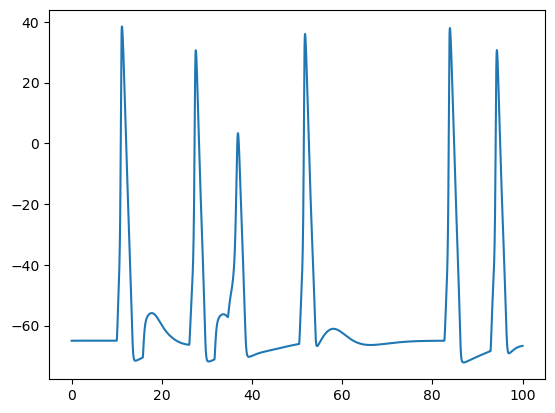

In [9]:
shape_window = h.PlotShape(True)
shape_window.show(0)

t = h.Vector().record(h._ref_t)
h.finitialize(-65 * mV)
h.continuerun(100)

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(t, smallworld.cells[0].soma_v)
plt.show()



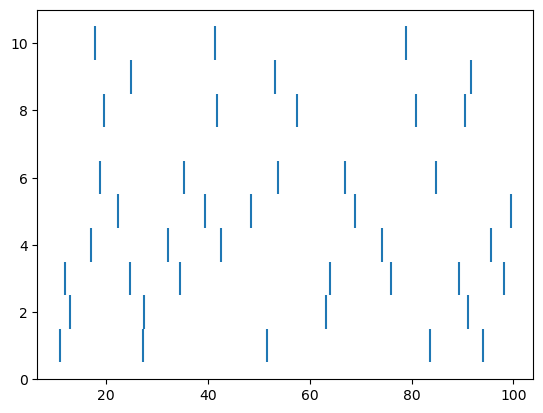

In [10]:
plt.figure()
for i, cell in enumerate(smallworld.cells):
    # print(i, cell.spike_times)
    if len(cell.spike_times) > 0:
        plt.vlines(cell.spike_times, i + 0.5, i + 1.5)
plt.show()